# Introduction to NetworkX

## F. Mráz

NetworkX is a Python package for modeling, analyzing, and visualizing networks

* several types of networks
* several algorithms for network analysis
* read/write networks in many formats

Documentation:  <https://networkx.github.io/documentation/stable/>

At first, we must import the module networkx

In [30]:
import networkx as nx

## Creating Simple Graphs 

In [31]:
# create an undirected graph (network)
G = nx.Graph()

The graph can have arbitrary additional information.

In [32]:
G.name = "The first simple graph"
G

In [33]:
G.name

'The first simple graph'

### Nodes

Nodes in graphs manipulated with networkx can be arbitrary objects that are hashable. Most common are *numbers* and  *strings*.

In [34]:
# adding one node at a time
G.add_node(1)
G.add_node(2)

# adding several nodes at once
G.add_nodes_from([3,4,5,6])

G.nodes

NodeView((1, 2, 3, 4, 5, 6))

The argument `X` in `nx.add_nodes_from(X)` can be any iterable container.

Even a graph can be a node!

### Edges

In [35]:
# adding edges one at a time
G.add_edge(1,2)
e = (2,3)
G.add_edge(*e)    # unpack the tuple e

# adding several edges at once
G.add_edges_from([(3,4),(4,5),(5,6),(6,1)])

G.edges

EdgeView([(1, 2), (1, 6), (2, 3), (3, 4), (4, 5), (5, 6)])

The argument `E` in `nx.add_nodes_from(E)` can be any iterable container of edge-tuples. An edge-tuple can be
* a 2-tuple - `(node`$_1$ `,node`$_2$ `)`, or
* a 3-tuple - `(node`$_1$ `,node`$_2$ `, dc)`, where `dc` is a dictionary of edge attributes.

In [36]:
G.add_edge(1,2,weight=2.1)
G.add_edges_from([(2,3,{'weight':1.0}), (3,4,{'weight': 3.9})  ])
G.edges

EdgeView([(1, 2), (1, 6), (2, 3), (3, 4), (4, 5), (5, 6)])

### Notes

* Adding existing nodes is no error.
* Adding existing edges is no error.
* Even a graph can be a node!
* Any edge and node can have an arbitrary number of attributes.

In [37]:
G.nodes[1]['name'] = "A"
G.nodes[2]['name'] = "B"
G.add_node(3,name = "C")
G.nodes

NodeView((1, 2, 3, 4, 5, 6))

In [38]:
list(G.nodes)

[1, 2, 3, 4, 5, 6]

In [39]:
G.nodes[1]

{'name': 'A'}

In [40]:
G.nodes.data()

NodeDataView({1: {'name': 'A'}, 2: {'name': 'B'}, 3: {'name': 'C'}, 4: {}, 5: {}, 6: {}})

### Removing Nodes and Edges

In [41]:
G.remove_edge(1,6)
G.remove_edges_from([(4,5),(5,6)])
G.remove_node(4)
G.remove_nodes_from([5,6])
print(list(G.nodes))
print(list(G.edges))

[1, 2, 3]
[(1, 2), (2, 3)]


In [42]:
# removing a non-existing edge
# G.remove_edge(1,6)

### Accessing Nodes and Edges

In [43]:
G.clear()              # clear everything from G
G.add_edges_from([(1,2,{'weight':1.0}), (2,3,{'weight':2.0}), (1,3,{'weight':1.5}), 
                  (3,4,{'weight':2.0})])
print('Nodes:',list(G.nodes))
print('Edges:',list(G.edges))

Nodes: [1, 2, 3, 4]
Edges: [(1, 2), (1, 3), (2, 3), (3, 4)]


In [44]:
G[1]   # this is a view on the neighbors of node 1

AtlasView({2: {'weight': 1.0}, 3: {'weight': 1.5}})

In [45]:
G.adj

AdjacencyView({1: {2: {'weight': 1.0}, 3: {'weight': 1.5}}, 2: {1: {'weight': 1.0}, 3: {'weight': 2.0}}, 3: {2: {'weight': 2.0}, 1: {'weight': 1.5}, 4: {'weight': 2.0}}, 4: {3: {'weight': 2.0}}})

In [46]:
G.adj[1]

AtlasView({2: {'weight': 1.0}, 3: {'weight': 1.5}})

In [47]:
G[1][2]

{'weight': 1.0}

In [48]:
#G[1][4]

How can we check whether there exists an edge between two given nodes? Fill a code instead of <YOUR CODE ... >

In [49]:
G.edges[1,2]

method1 = 4 in G[1]
method2 = G.has_edge(1,3)

print(method1, method2)

False True


In [50]:
G.edges[1,2]['color'] = "blue"
G[2][3]['color'] = "red"
G[2]

AtlasView({1: {'weight': 1.0, 'color': 'blue'}, 3: {'weight': 2.0, 'color': 'red'}})

In [51]:
list(G.adjacency())

[(1, {2: {'weight': 1.0, 'color': 'blue'}, 3: {'weight': 1.5}}),
 (2,
  {1: {'weight': 1.0, 'color': 'blue'}, 3: {'weight': 2.0, 'color': 'red'}}),
 (3,
  {2: {'weight': 2.0, 'color': 'red'},
   1: {'weight': 1.5},
   4: {'weight': 2.0}}),
 (4, {3: {'weight': 2.0}})]

In [52]:
for (u,v,w) in G.edges.data('weight'):
    print('{}, {}, {}'.format(u,v,w))

1, 2, 1.0
1, 3, 1.5
2, 3, 2.0
3, 4, 2.0


### Attributes of Graphs, Nodes and Edges

Each graph, node, and edge can have attributes that are stored in an associated attribute dictionary. Attributes are empty by default. 

#### Graph Attributes

They can be added when creating a new graph,

In [53]:
G = nx.Graph(time = '1pm')    
G.graph

{'time': '1pm'}

and any attribute can be changed or added later

In [54]:
G.graph['time'] = '2pm'
print(G.graph)
G.graph['event'] = 'tournament'
G.graph

{'time': '2pm'}


{'time': '2pm', 'event': 'tournament'}

#### Node attributes

In [55]:
G.add_node(1, name='Ethan')
G.add_nodes_from([3,4], team='Bulls')
G.nodes[1]

{'name': 'Ethan'}

In [56]:
G.nodes[1]['court'] = 4
G.nodes.data()

NodeDataView({1: {'name': 'Ethan', 'court': 4}, 3: {'team': 'Bulls'}, 4: {'team': 'Bulls'}})

**Warning:** Adding nodes to `G.nodes` does not add them to the graph. It is necessary to use `add_node()` or `add_nodes_from()`. Similarly for edges!

#### Edge Attributes

In [57]:
G.add_edge(1, 2, round=1 )
G.add_edges_from([(3, 4), (4, 5)], round=2)
G.add_edges_from([(1, 2, {'round': 3}), (2, 3, {'time': '3pm'})])
G[1][2]['time'] = '2:30pm'
G.edges[3, 4]['time'] = '4pm'
list(G.adjacency())

[(1, {2: {'round': 3, 'time': '2:30pm'}}),
 (3, {4: {'round': 2, 'time': '4pm'}, 2: {'time': '3pm'}}),
 (4, {3: {'round': 2, 'time': '4pm'}, 5: {'round': 2}}),
 (2, {1: {'round': 3, 'time': '2:30pm'}, 3: {'time': '3pm'}}),
 (5, {4: {'round': 2}})]

#### Edge Attributes - Weight Attribute

The attribute `weight` is special, as it is used by several algorithms implemented in `networkx`. Therefore, the attribute `weight` must be numeric.

In [58]:
#G[1][3]['weight'] = 2.3

Oops! What is the error? Correct the above code in order to add an edge between nodes 1 and 3 with a weight of `2.3`.

Once again, with the `weight` attribute

In [59]:
# corrected code
G.add_edge(1,3,weight=2.3)


In [60]:
G.add_edge(1,2,weight=3.2)
G.add_weighted_edges_from([(2,3,1.2), (3,1,0.5)])
print(G.adj[2])
G[1][2]['weight'] = 2
print(G.adj[2])

{1: {'round': 3, 'time': '2:30pm', 'weight': 3.2}, 3: {'time': '3pm', 'weight': 1.2}}
{1: {'round': 3, 'time': '2:30pm', 'weight': 2}, 3: {'time': '3pm', 'weight': 1.2}}


## Directed Graphs

Directed graphs are represented by the class `DiGraph` with some specific properties, like `DiGraph.out_edges()`, `Digraph.in_degree()`, `DiGraph.out_degree()`, `DiGraph.predecessors()`, `DiGraph.successors()`. Actually, the directed versions of `neighbors()` is equivalent to `successors()` while `degree` reports the sum of `in_degree` and `out_degree`. 

In [61]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75), (2, 4, 2.1), (4, 1, 0.4)])
DG.out_degree(1, weight='weight')
DG.degree(1, weight='weight')

node = 1
print('Node {} has successors {} and predecessors {}'.format(
    node, list(DG.successors(node)), list(DG.predecessors(node))) 
     )

print('Neighbors of node {} are {}'.format(
    node, list(DG.neighbors(node)))  )

Node 1 has successors [2] and predecessors [3, 4]
Neighbors of node 1 are [2]


## Drawing Graphs



In [62]:
import matplotlib.pyplot as plt

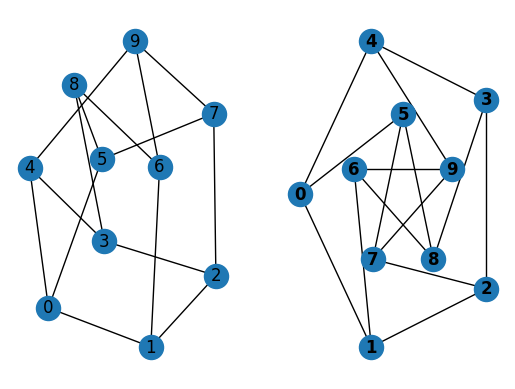

In [63]:
G = nx.petersen_graph()
plt.subplot(121)

nx.draw(G, with_labels=True, font_weight='normal')
# nx.draw(G)
plt.subplot(122)

nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

The node labels are hardly readable; let us change the color of the nodes in the right plot.

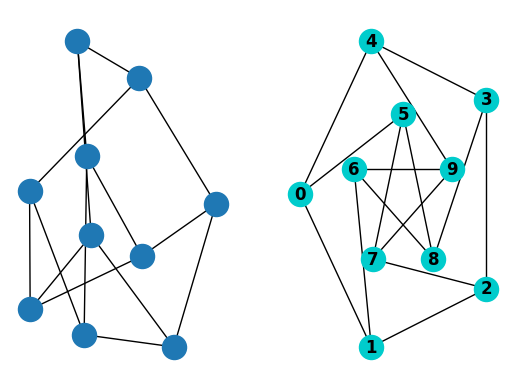

In [64]:
%matplotlib inline

G = nx.petersen_graph()
plt.subplot(121)

#nx.draw(G, with_labels=True, font_weight='bold')
nx.draw(G)
plt.subplot(122)

nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold',
              node_color="#00CCCC")

## Exercises

### 1. Construct a Simple Graph

Implement function `gener_house_graph()` that returns an undirected graph representing the following drawing

![House.png](House.png)

using the parameters `font_weight='bold'` and `node_color="#00FF00"`.



In [65]:
def gener_house_graph():
    G = nx.Graph()
    G.add_nodes_from(['A','B','C','D','E'])
    G.add_edges_from([('A','B'), ('A','C'), ('A','E'), ('B','C'), ('C','D'), ('D','E'), ('B', 'E'), ('C', 'E')])
    plt.figure(figsize=(2,3))
    nx.draw_shell(G, nlist = [['A','B','C','D','E']],with_labels=True, font_weight='bold',
              node_color="#00FF00")

def generate_house_graph(draw_graph: bool = False):
    house_graph = nx.Graph()
    for node in "ABCDE":
        house_graph.add_node(node)

    for edge in map(
        list, ["AB", "AC", "AE", "BC", "BE", "CE", "CD", "ED"]
    ):
        house_graph.add_edge(*edge)

    if draw_graph:
        plt.figure(figsize = (2,3))
        nx.draw(
            house_graph, 
            with_labels=True, 
            font_weight="bold", 
            node_color="#90EE90",
            pos={
                "A": [-1, -1],
                "B": [1, -1],
                "C": [1, 1],
                "D": [0, 2],
                "E": [-1, 1]
            },
        )

    return house_graph


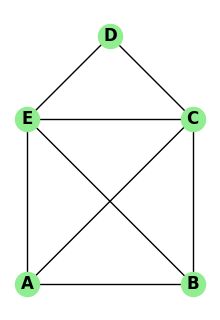

In [66]:
G = generate_house_graph(True)

Implement the following functions, assume that the graph is undirected if not said otherwise:

In [67]:
from collections import Counter

def compute_diameter(G):
    # returns the diameter of graph G
    return nx.diameter(G)

def compute_degrees(G):
    # returns list of degrees of nodes in G
    return [G.degree(node) for node in list(G.nodes)]

def avg_degree(G):
    # return the average degree of nodes in G
    return sum(compute_degrees(G)) / len(list(G.nodes))

def degree_histogram(G):
    # plot histogram of degrees of nodes in graph G
    degrees = compute_degrees(G)

    plt.hist(degrees)

    plt.xlabel('Degrees')
    plt.ylabel('Counts')
    
    plt.xticks(list(set(degrees)))
    plt.yticks(list(set(Counter(degrees).values())))
    
    plt.show()


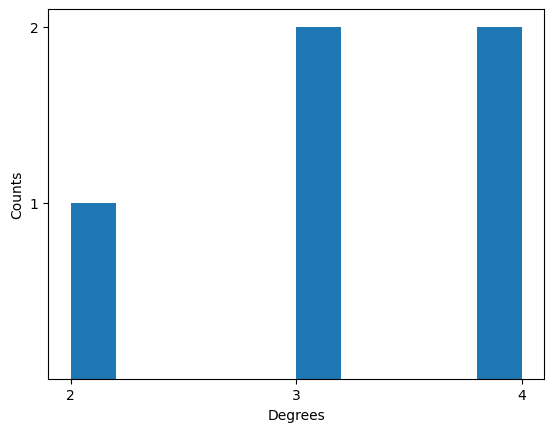

In [68]:
degree_histogram(G)

A center of a graph is a node where the maximum distance (number of edges) traversed to any other node is a minimum, compared to any other node. Essentially, the center of a graph is the most centrally located node. Note that there may be more than one node that qualifies as the center of the graph.

In [69]:
def centers(G):
    return nx.center(G)

def max_diameter_graph(Nodes):
    # return a graph with the set of nodes Nodes and maximal possible diameter
    G = nx.Graph()
    previous_node = Nodes[0]
    for node in Nodes[1:]:
        G.add_edge(previous_node, node)
        previous_node = node
    return G

def min_diameter_graph(Nodes):
    # return a graph with the set of nodes Nodes and minimal diameter
    G = nx.Graph()
    main_node = Nodes[0]
    for node in Nodes[1:]:
        G.add_edge(main_node, node)
    return G



['C', 'E']


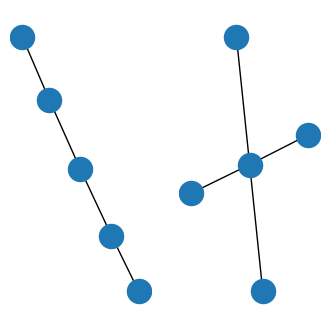

In [70]:
print(centers(G))
plt.figure(figsize=(4,4))
plt.subplot(121)
nx.draw(max_diameter_graph([1,2,3,4,5]))
plt.subplot(122)
nx.draw(min_diameter_graph([1,2,3,4,5]))

In [86]:
def binomial_graph(N,prob):
    import random
    G = nx.Graph()
    # generate graph with N nodes 1,...,N where the probability that a pair 
    # of nodes is connected by an edge is prob
    for i in range(N):
        for j in range(i+1,N):
            if random.random() < prob:
                G.add_edge(i,j)
    return G

def describe_graph(G):
    import numpy as np
    # print description of graph G. The description should list 
    # as many properties as possible. E.g., the number of nodes and edges,
    # average degree, standard deviation from the average, number and names of different 
    # attributes of nodes, of edges, etc.
    print(f'Number of nodes : {G.number_of_nodes()}')
    print(f'Number of edges : {G.number_of_edges()}')
    print(f'Average degree with std: {avg_degree(G)}\u00b1{np.std(compute_degrees(G)):.3f}')
    print(f'Adjacency data:\n {list(G.adjacency())}')
    print(f'Node data:\n {list(G.nodes.data())}')
    print(f'Edge data:\n {list(G.edges.data())}')
    print(f'Centers are : {centers(G)}')

In [80]:
G = nx.karate_club_graph()

In [81]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [82]:
len(list(G.edges))

78

In [83]:
G.nodes.data

<bound method NodeView.data of NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))>

In [84]:
G.adj

AdjacencyView({0: {1: {'weight': 4}, 2: {'weight': 5}, 3: {'weight': 3}, 4: {'weight': 3}, 5: {'weight': 3}, 6: {'weight': 3}, 7: {'weight': 2}, 8: {'weight': 2}, 10: {'weight': 2}, 11: {'weight': 3}, 12: {'weight': 1}, 13: {'weight': 3}, 17: {'weight': 2}, 19: {'weight': 2}, 21: {'weight': 2}, 31: {'weight': 2}}, 1: {0: {'weight': 4}, 2: {'weight': 6}, 3: {'weight': 3}, 7: {'weight': 4}, 13: {'weight': 5}, 17: {'weight': 1}, 19: {'weight': 2}, 21: {'weight': 2}, 30: {'weight': 2}}, 2: {0: {'weight': 5}, 1: {'weight': 6}, 3: {'weight': 3}, 7: {'weight': 4}, 8: {'weight': 5}, 9: {'weight': 1}, 13: {'weight': 3}, 27: {'weight': 2}, 28: {'weight': 2}, 32: {'weight': 2}}, 3: {0: {'weight': 3}, 1: {'weight': 3}, 2: {'weight': 3}, 7: {'weight': 3}, 12: {'weight': 3}, 13: {'weight': 3}}, 4: {0: {'weight': 3}, 6: {'weight': 2}, 10: {'weight': 3}}, 5: {0: {'weight': 3}, 6: {'weight': 5}, 10: {'weight': 3}, 16: {'weight': 3}}, 6: {0: {'weight': 3}, 4: {'weight': 2}, 5: {'weight': 5}, 16: {'weigh

In [87]:
describe_graph(G)

Number of nodes : 34
Number of edges : 78
Average degree with std: 4.588235294117647±3.820
Adjacency data:
 [(0, {1: {'weight': 4}, 2: {'weight': 5}, 3: {'weight': 3}, 4: {'weight': 3}, 5: {'weight': 3}, 6: {'weight': 3}, 7: {'weight': 2}, 8: {'weight': 2}, 10: {'weight': 2}, 11: {'weight': 3}, 12: {'weight': 1}, 13: {'weight': 3}, 17: {'weight': 2}, 19: {'weight': 2}, 21: {'weight': 2}, 31: {'weight': 2}}), (1, {0: {'weight': 4}, 2: {'weight': 6}, 3: {'weight': 3}, 7: {'weight': 4}, 13: {'weight': 5}, 17: {'weight': 1}, 19: {'weight': 2}, 21: {'weight': 2}, 30: {'weight': 2}}), (2, {0: {'weight': 5}, 1: {'weight': 6}, 3: {'weight': 3}, 7: {'weight': 4}, 8: {'weight': 5}, 9: {'weight': 1}, 13: {'weight': 3}, 27: {'weight': 2}, 28: {'weight': 2}, 32: {'weight': 2}}), (3, {0: {'weight': 3}, 1: {'weight': 3}, 2: {'weight': 3}, 7: {'weight': 3}, 12: {'weight': 3}, 13: {'weight': 3}}), (4, {0: {'weight': 3}, 6: {'weight': 2}, 10: {'weight': 3}}), (5, {0: {'weight': 3}, 6: {'weight': 5}, 10:

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=70a403a5-1e92-4110-96fa-e83ee0a7b186' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>